In [1]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns

In [2]:
mass = pd.read_csv("mass.csv")
romantic = pd.read_csv("romantic.csv")

Text(0.5, 1.0, 'energy intensity across all songs in both playlists')

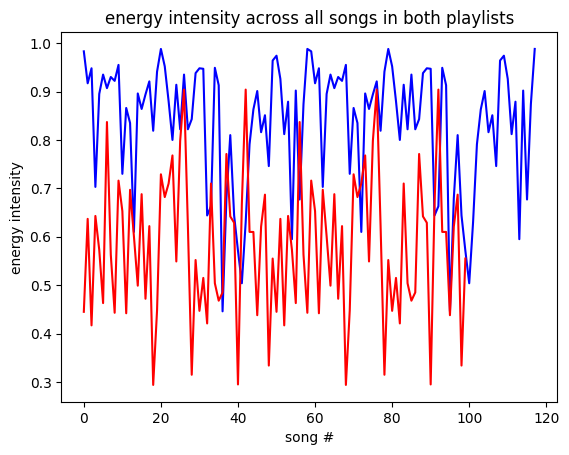

In [3]:
plt.plot(mass.energy, color='blue')
plt.plot(romantic.energy, color='red')
plt.xlabel("song #")
plt.ylabel("energy intensity")
plt.title("energy intensity across all songs in both playlists")

In [5]:
mass_romantic = pd.read_csv("mass_romantic_new.csv")
mass_romantic.head()

,energy,acousticness,valence,target
0,0.983,0.538,0.589,1
1,0.917,0.772,0.696,1
2,0.948,0.431,0.914,1
3,0.703,0.281,0.588,1
4,0.895,0.317,0.794,1


In [6]:
mass_romantic.isnull().values.any()

False

In [7]:
mass_romantic.dtypes

energy          float64
acousticness    float64
valence         float64
target            int64
dtype: object

In [9]:
mass_romantic['enwrgy']=mass_romantic['energy'].astype(int)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(mass_romantic.drop('target', axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(mass_romantic.drop('target',axis=1))
scaled_features

array([[ 1.41527883,  0.50020865, -0.0180231 ,  0.        ],
       [ 1.061496  ,  1.55151969,  0.46090922,  0.        ],
       [ 1.22766673,  0.01948095,  1.43667788,  0.        ],
       [-0.085618  , -0.65443638, -0.0224991 ,  0.        ],
       [ 0.9435684 , -0.49269622,  0.89955752,  0.        ],
       [ 1.15798223,  0.59455708,  1.39191785,  0.        ],
       [ 1.00789255, -1.8239076 , -0.47905141,  0.        ],
       [ 1.1311805 ,  0.72934054,  0.49671725,  0.        ],
       [ 1.08829773,  0.39238188,  0.2818691 ,  0.        ],
       [ 1.26518915, -0.600523  ,  0.97117357,  0.        ],
       [ 0.05911134, -0.75777038,  1.15021369,  0.        ],
       [ 0.78811837, -0.05240356,  0.62204533,  0.        ],
       [ 0.62194765, -0.09733139,  0.93536554,  0.        ],
       [-0.58413016, -0.78472707,  0.06702096,  0.        ],
       [ 0.94892874,  1.42572179,  0.73842141,  0.        ],
       [ 0.77739768, -0.90603219,  0.38481717,  0.        ],
       [ 0.93820805, -1.

In [13]:
mass_romantic_feat = pd.DataFrame(scaled_features, columns = mass_romantic.columns[:-1])
mass_romantic_feat.head()

,energy,acousticness,valence,target
0,1.415279,0.500209,-0.018023,0.0
1,1.061496,1.551520,0.460909,0.0
2,1.227667,0.019481,1.436678,0.0
3,-0.085618,-0.654436,-0.022499,0.0
4,0.943568,-0.492696,0.899558,0.0


In [14]:
from sklearn.model_selection import train_test_split
X = mass_romantic_feat
y = mass_romantic['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, shuffle=True)

In [15]:
import math
math.sqrt(len(y_test))

8.12403840463596

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [17]:
prediction = knn.predict(X_test)
prediction

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.87      0.75      0.81        36

    accuracy                           0.80        66
   macro avg       0.81      0.81      0.80        66
weighted avg       0.81      0.80      0.80        66



In [19]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'error rate')

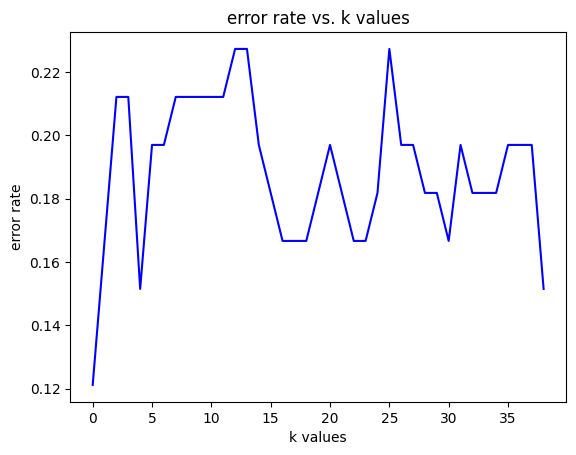

In [20]:
plt.plot(error_rate, color='blue')
plt.title('error rate vs. k values')
plt.xlabel('k values')
plt.ylabel('error rate')

In [21]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
prediction= knn.predict(X_test)
prediction

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [22]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.85      0.78      0.81        36

    accuracy                           0.80        66
   macro avg       0.80      0.81      0.80        66
weighted avg       0.81      0.80      0.80        66

